Introduction : Quel que soit le domaine dans lequel on travaille, il peut être intéressant de savoir construire des groupes d’observations qui se ressemblent. On appelle cela des clusters.
Il existe deux méthodes classiques pour réaliser des clusters :
la méthode des kmeans,
et celle du clustering hiérarchique.
Dans ce Tp , nous intrésserons a la méthode K-means.

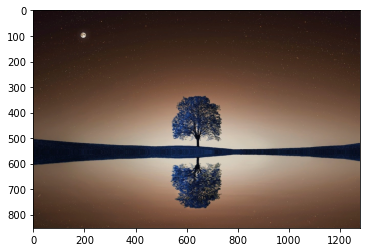

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io


image = cv2.imread('fleur.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 6)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('fleur6.jpg', quant)
plt.imshow(image)

cv2.imread('fleur6.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

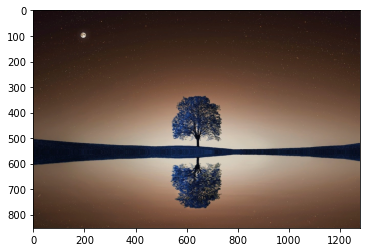

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io


image = cv2.imread('fleur.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('fleur3.jpg', quant)
plt.imshow(image)

cv2.imread('fleur3.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

Conclusion : Un nombre K grand peut conduire à un partitionnement trop fragmenté des données. Ce qui empêchera de découvrir des patterns intéressants dans les données. Par contre, un nombre de clusters trop petit, conduira à avoir, potentiellement, des cluster trop généralistes contenant beaucoup de données.

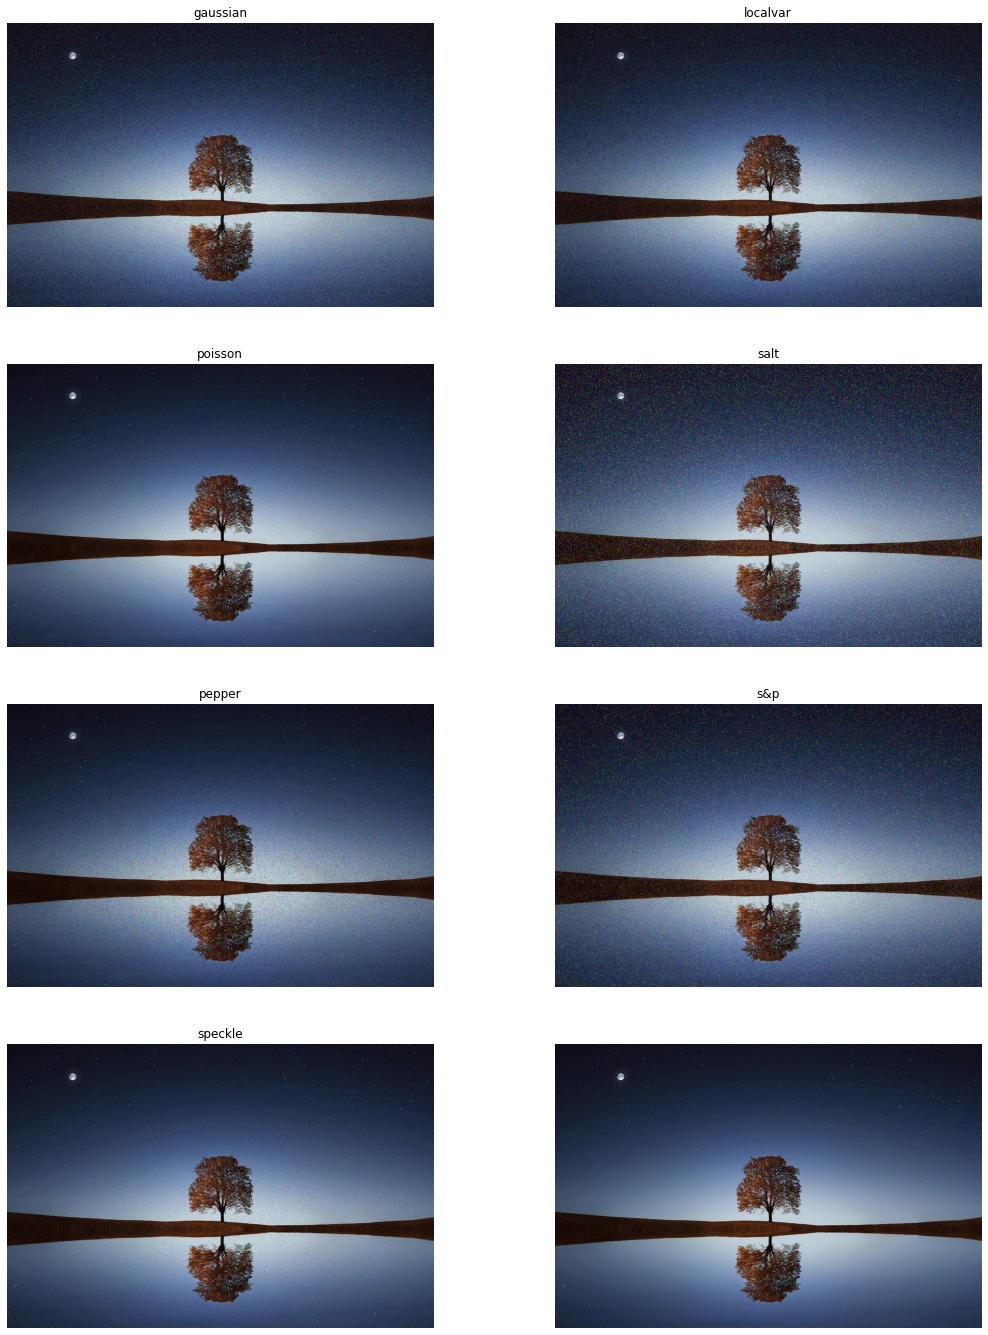

In [26]:
import skimage.io
import matplotlib.pyplot as plt
img_path="fleur.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


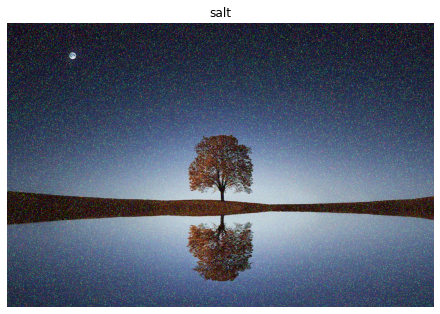

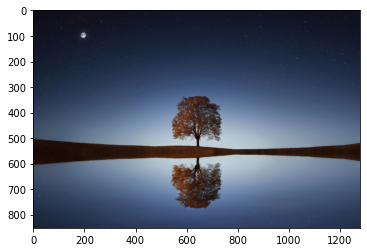

In [24]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="fleur.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "salt", r,c,3)
plt.show()
denoised_image = denoise_tv_chambolle(img,
weight=0.1,
multichannel=True)
# Show denoised image
#plt.imshow(img)
plt.imshow(denoised_image)

Conclusion générale : Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données.
